In [85]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


# Logistic Regression Class (Binary initally:)


In [86]:
def logisticX(X):
    """
    Input:
        The features classes as a matrix of the  with shape (N,p-1)
    Ouput:
        The design matrix used in logistic regression with shape 
    Add 1s to the matrix of the features as the first column.
    """
    ONE = np.ones((X.shape[0])).reshape(X.shape[0],1)
    X = np.concatenate((ONE, X), axis=1)
    
    return X

In [171]:
class LogisticRegression(object):
    
    def __init__(self, X, y, optimizer, learning_rate= 0.01, batch_size = 32, max_epoch=100):
        
        self.X = X
        self.y = y
        self.optimizer = optimizer
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.max_epoch = max_epoch
        
    @staticmethod  
    def prob(beta, X):
        # The probability that y=1:
        p = 1/(1+np.exp(-beta.dot(X.T)))
        return p
    
    @staticmethod  
    def compute_cost(X, y, beta):
        # Computing the cost fucntion to see the how the effect of the learning_rate and the optimizer
        
        # Cross Entropy Cost Function
        cost = -np.sum(y.dot(X.dot(beta))-(1-y).dot(np.log(1-LogisticRegression.prob(beta,X))))
        return cost
    
    @staticmethod      
    def accuracy(y,y_pred):
        acc = np.sum(y==np.round(y_pred))/len(y)
        return acc
    
    @staticmethod
    def softmax(X):
        out = np.exp(X)/np.sum(np.exp(X))
    
    def fit(self,X,y):
        # Initializing beta 
        self.beta = np.random.standard_normal(X.shape[1])
        #self.beta = np.random.randn(0,1,size=(X.shape[1]))
        
        # Intializing the cost  
        self.costs = []
        
        # Initializing the iterations
        self.iter_no = 0
        # Creatie randomized index for the batches
        M = X.shape[0] # This is amount of datapoitns (??)
        idx = np.arange(0,M)
        
        for epoch in range(self.max_epoch):
            # Randomizing the data for each epoch
            np.random.shuffle(idx)
            X = X[idx,:]
            y = y[idx]
            
            for i in range(0, M, self.batch_size):
                self.iter_no = self.iter_no + i
                
                X_batch = X[i:i+self.batch_size,:]
                y_batch = y[i:i+self.batch_size]
                
                
                
                # Calculating the gradient
                gradient = -X_batch.T.dot(y_batch-LogisticRegression.prob(self.beta,X_batch))
                
                # Updating Beta
                self.beta -= self.learning_rate*gradient 
                

            # Computing the cost and storing it (interesting to see with the different optimizers)
            cost = self.compute_cost(X, y, self.beta)
            self.costs.append(cost)
        return self
    
    def predict(self,X):
        y_pred = LogisticRegression.prob(X,self.beta)
        return y_pred

In [172]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the data
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,random_state=0)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [173]:
#now scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [174]:
logreg = LogisticRegression(X_train_scaled, y_train, optimizer=["SGD"], learning_rate= 0.05, batch_size = 10, max_epoch=1000)

In [175]:
logreg.fit(X_train_scaled, y_train)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log


In [180]:
costlog=logreg.costs
print(len(costlog))

1000


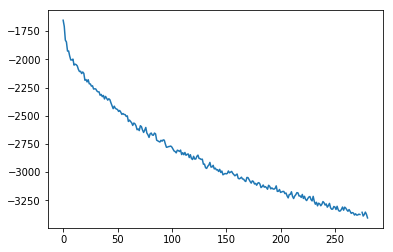

In [176]:
import matplotlib.pyplot as plt
plt.plot(logreg.costs)
plt.title()
plt.show()

In [168]:
y_pred = logreg.predict(X_test_scaled)

In [169]:
acc = np.sum(y_test==np.round(y_pred))/len(y_test)

In [170]:
acc

0.93706293706293708

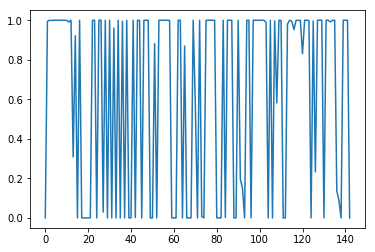

In [158]:
plt.plot(y_pred)
plt.show()

# The maximum likelihood for the data set $D$ given the parameter $\hat{\beta}$
$P(D|\hat{\beta}) = \prod_{i=1}^n \left[p(y_i=1|x_i,\hat{\beta})\right]^{y_i}\left[1-p(y_i=1|x_i,\hat{\beta}))\right]^{1-y_i}$

# The cost function for logistic regression is given as the negative log of the MLE
# $\mathcal{C}(\hat{\beta}) = \sum_{i=1}^n \left( y_i\log{p(y_i=1|x_i,\hat{\beta})} + (1-y_i)\log\left[1-p(y_i=1|x_i,\hat{\beta}))\right]\right)$
# And its derivative (in vector notation):
# $\frac{\partial \mathcal{C}(\hat{\beta})}{\partial \hat{\beta}} = -\hat{X}^T\left(\hat{y}-\hat{p}\right) $


# Loading the MNIST data base
## There are 1797 images of size 8x8 pixels in "grayscale"

In [199]:
from sklearn import datasets

digits = datasets.load_digits()

# define inputs and labels
inputs = digits.images
labels = digits.target

print("inputs = (n_inputs, pixel_width, pixel_height) = " + str(inputs.shape))
print("labels = (n_inputs) = " + str(labels.shape))


# flatten the image
# the value -1 means dimension is inferred from the remaining dimensions: 8x8 = 64
n_inputs = len(inputs)
inputs = inputs.reshape(n_inputs, -1)
print("X = (n_inputs, n_features) = " + str(inputs.shape))


# choose some random images to display
indices = np.arange(n_inputs)
random_indices = np.random.choice(indices, size=5)

"""
for i, image in enumerate(digits.images[random_indices]):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Label: %d" % digits.target[random_indices[i]])
plt.show()
"""

inputs = (n_inputs, pixel_width, pixel_height) = (1797, 8, 8)
labels = (n_inputs) = (1797,)
X = (n_inputs, n_features) = (1797, 64)


'\nfor i, image in enumerate(digits.images[random_indices]):\n    plt.subplot(1, 5, i+1)\n    plt.axis(\'off\')\n    plt.imshow(image, cmap=plt.cm.gray_r, interpolation=\'nearest\')\n    plt.title("Label: %d" % digits.target[random_indices[i]])\nplt.show()\n'

In [197]:
X_train, X_test, Y_train, Y_tes = train_test_split(inputs, labels, test_size = 0.2)

In [198]:
print("Number of training images: " + str(len(X_train)))
print("Number of test images: " + str(len(X_test)))

Number of training images: 1437
Number of test images: 360


In [201]:
# One-hot in numpy (from lecture notes week 41)

In [202]:
def to_categorical_numpy(integer_vector):
    n_inputs = len(integer_vector)
    n_categories = np.max(integer_vector) + 1
    onehot_vector = np.zeros((n_inputs, n_categories))
    onehot_vector[range(n_inputs), integer_vector] = 1
    
    return onehot_vector
